<a href="https://colab.research.google.com/github/aerraj/finacrash/blob/main/Assign4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance --quiet

In [15]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from numpy.linalg import svd

plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (10, 6)

In [16]:
file_path = "/content/XLK_Holdings.xlsx"

holdings = pd.read_excel(file_path)
print("Columns:", holdings.columns)
holdings.head()

Columns: Index(['Name', 'Ticker', 'Identifier', 'SEDOL', 'Weight', 'Sector',
       'Shares Held', 'Local Currency'],
      dtype='object')


,Name,Ticker,Identifier,SEDOL,Weight,Sector,Shares Held,Local Currency
0,NVIDIA CORP,NVDA,67066G104,2379504,14.492967,-,72068007.0,USD
1,MICROSOFT CORP,MSFT,594918104,2588173,12.577829,-,21954621.0,USD
2,APPLE INC,AAPL,037833100,2046251,12.195063,-,43832663.0,USD
3,BROADCOM INC,AVGO,11135F101,BDZ78H9,5.051600,-,13892235.0,USD
4,ORACLE CORP,ORCL,68389X105,2661568,3.738703,-,11829629.0,USD


## a. Find the 30 largest holdings.


In [8]:
ticker_col = 'Ticker'
weight_col = 'Weight'
top30 = holdings.sort_values(by=weight_col, ascending=False).head(30)
tickers = top30[ticker_col].dropna().unique().tolist()
print("Top 30 Tickers:", tickers)


Top 30 Tickers: ['NVDA', 'MSFT', 'AAPL', 'AVGO', 'ORCL', 'PLTR', 'AMD', 'CSCO', 'IBM', 'CRM', 'MU', 'NOW', 'LRCX', 'INTU', 'QCOM', 'AMAT', 'TXN', 'INTC', 'APP', 'ACN', 'ANET', 'APH', 'KLAC', 'ADBE', 'PANW', 'CRWD', 'ADI', 'CDNS', 'SNPS', 'MSI']


# b. Get at least 6 months of data (~ 120 data points)

In [18]:
end = pd.to_datetime('today')
start = end - pd.Timedelta(days=180)

prices = yf.download(tickers, start=start, end=end)['Close']
prices = prices.fillna(method='ffill').dropna(axis=1, how='any')
prices.head()


/tmp/ipython-input-3690221251.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(tickers, start=start, end=end)['Close']
[*********************100%***********************]  30 of 30 completed
/tmp/ipython-input-3690221251.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  prices = prices.fillna(method='ffill').dropna(axis=1, how='any')


Ticker,AAPL,ACN,ADBE,ADI,AMAT,AMD,ANET,APH,APP,AVGO,...,MSI,MU,NOW,NVDA,ORCL,PANW,PLTR,QCOM,SNPS,TXN
Date,,,,,,,,,,,,,,,,,,,,,
2025-04-10,189.955048,283.800629,350.049988,176.852188,137.454086,88.699997,72.650002,63.928093,263.829987,171.601395,...,412.838989,69.940331,783.489990,107.556465,133.067261,168.270004,88.589996,132.841492,406.890015,154.161026
2025-04-11,197.666153,282.924988,352.470001,177.645416,144.115997,93.400002,72.669998,65.194099,249.949997,181.202316,...,420.302246,69.441116,785.669983,110.916039,132.069382,168.339996,88.550003,137.635254,421.209991,145.301208
2025-04-14,202.025497,288.347870,350.910004,177.090149,143.708313,94.500000,73.589996,65.253906,236.070007,177.636826,...,424.362305,70.908806,799.820007,110.696068,134.354507,169.979996,92.620003,137.575958,421.980011,148.628540
2025-04-15,201.646423,287.223511,350.380005,178.022202,144.623077,95.290001,73.199997,65.552971,245.470001,178.224426,...,428.531799,70.928772,816.500000,112.185883,133.656006,173.550003,98.400002,136.992783,425.649994,148.825424
2025-04-16,193.795639,283.820496,344.190002,174.442703,137.404358,88.290001,71.870003,64.566078,229.809998,173.902023,...,418.391663,69.221458,796.659973,104.476852,129.484848,169.759995,92.709999,134.165970,415.649994,144.267548


# c. Compute the daily returns

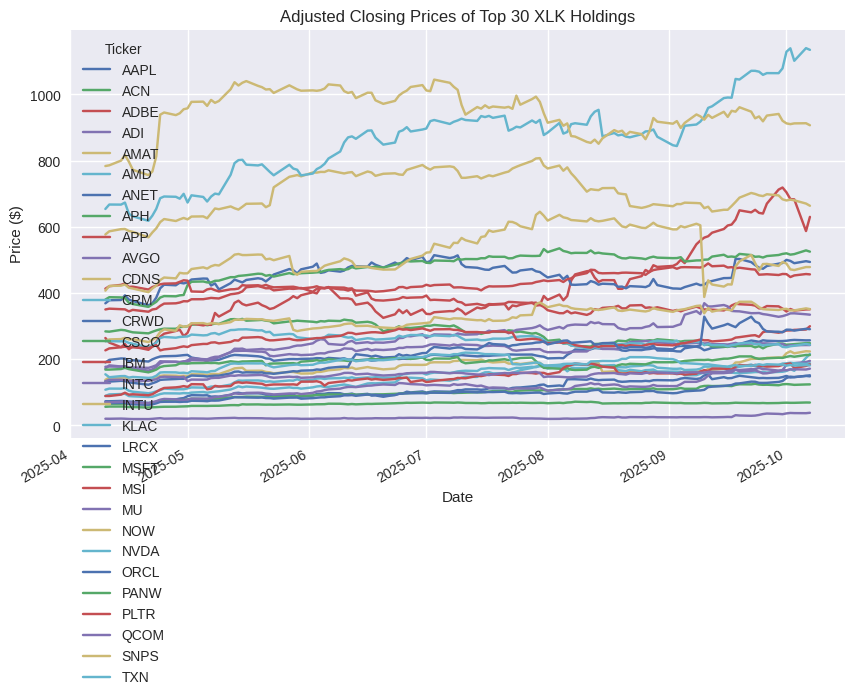

In [19]:
returns = prices.pct_change().dropna()
# Plot prices
prices.plot(title="Adjusted Closing Prices of Top 30 XLK Holdings")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.show()



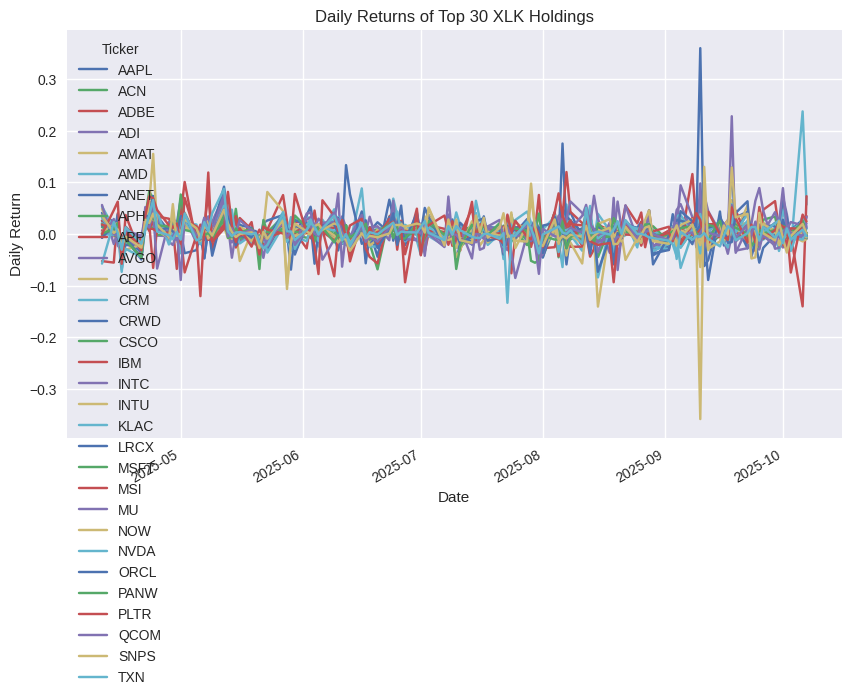

In [20]:
# Plot returns
returns.plot(title="Daily Returns of Top 30 XLK Holdings")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.show()

#d. Compute the covariance matrix.


In [21]:
cov_matrix = returns.cov()
cov_matrix.head()


Ticker,AAPL,ACN,ADBE,ADI,AMAT,AMD,ANET,APH,APP,AVGO,...,MSI,MU,NOW,NVDA,ORCL,PANW,PLTR,QCOM,SNPS,TXN
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,0.000273,0.000055,0.000082,0.000086,0.000145,0.000090,0.000149,0.000084,0.000122,0.000073,...,0.000073,0.000116,0.000080,0.000112,-0.000018,0.000086,0.000090,0.000082,0.000218,0.000079
ACN,0.000055,0.000267,0.000116,0.000104,0.000109,0.000052,0.000112,0.000029,0.000125,0.000035,...,0.000018,0.000052,0.000156,0.000042,-0.000018,0.000106,0.000010,0.000091,0.000201,0.000114
ADBE,0.000082,0.000116,0.000248,0.000095,0.000072,0.000065,0.000101,0.000045,0.000079,0.000052,...,0.000019,0.000053,0.000142,0.000049,-0.000037,0.000103,0.000046,0.000091,0.000154,0.000112
ADI,0.000086,0.000104,0.000095,0.000285,0.000224,0.000188,0.000131,0.000114,0.000142,0.000135,...,0.000021,0.000165,0.000160,0.000135,0.000071,0.000065,0.000124,0.000185,0.000136,0.000279
AMAT,0.000145,0.000109,0.000072,0.000224,0.000645,0.000349,0.000211,0.000169,0.000155,0.000239,...,0.000018,0.000401,0.000151,0.000262,0.000146,0.000111,0.000218,0.000243,0.000271,0.000197


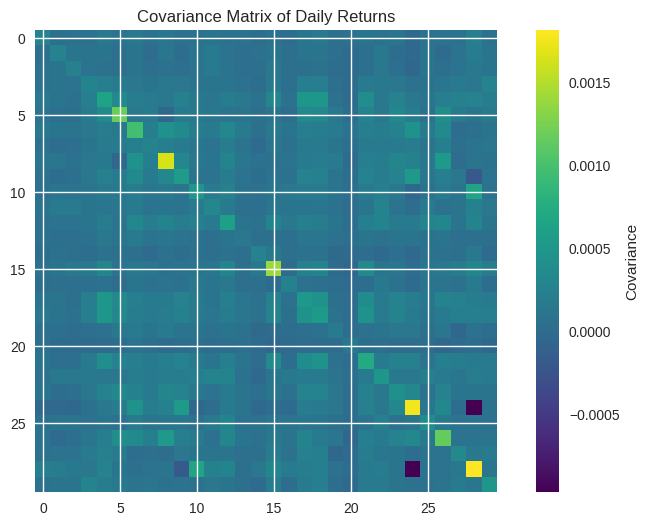

In [22]:
plt.imshow(cov_matrix, cmap="viridis", interpolation="none")
plt.colorbar(label="Covariance")
plt.title("Covariance Matrix of Daily Returns")
plt.show()


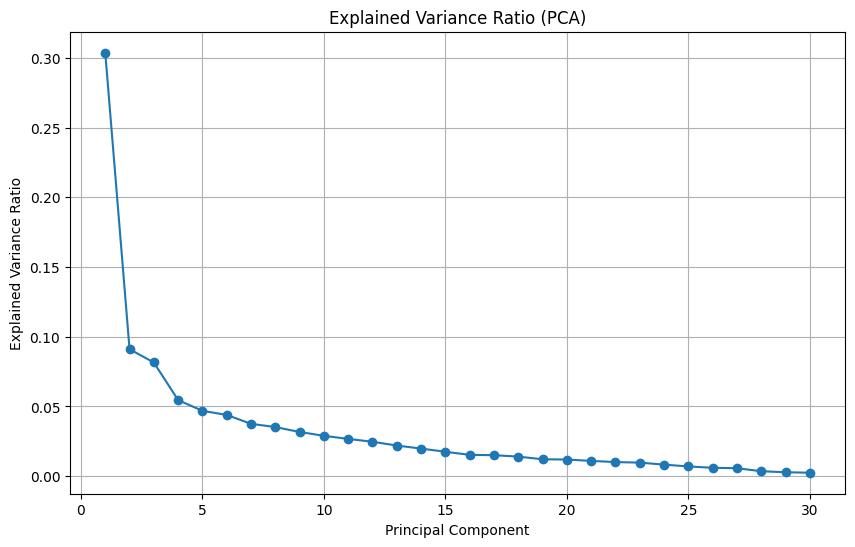

,Component,Explained Variance Ratio,Cumulative
0,1,0.303668,0.303668
1,2,0.091050,0.394719
2,3,0.081501,0.476219
3,4,0.054525,0.530744
4,5,0.046851,0.577595
5,6,0.043911,0.621506
6,7,0.037510,0.659016
7,8,0.035206,0.694222
8,9,0.031671,0.725892
9,10,0.028919,0.754811


In [12]:
scaler = StandardScaler()
X = scaler.fit_transform(returns)

pca = PCA()
pca.fit(X)

explained_ratio = pca.explained_variance_ratio_

plt.plot(range(1, len(explained_ratio) + 1), explained_ratio, marker='o')
plt.title("Explained Variance Ratio (PCA)")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()

pd.DataFrame({
    "Component": np.arange(1, len(explained_ratio) + 1),
    "Explained Variance Ratio": explained_ratio,
    "Cumulative": np.cumsum(explained_ratio)
}).head(10)


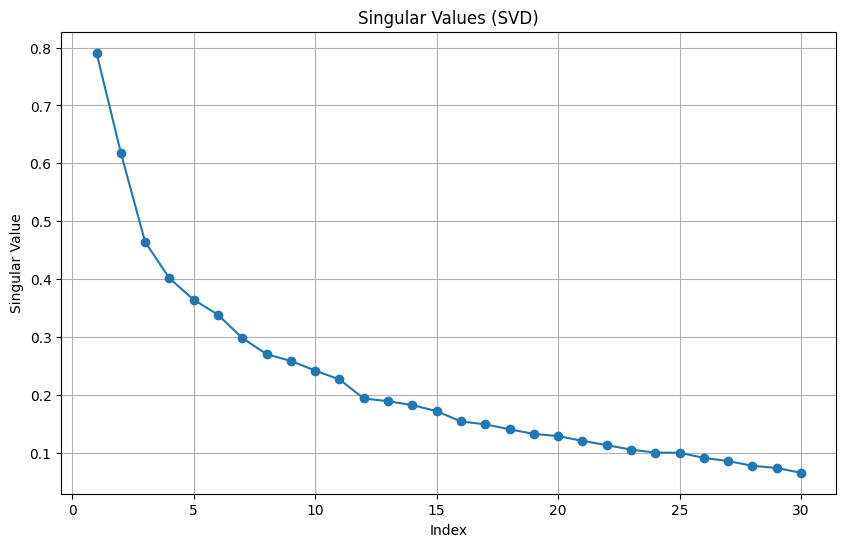

First 10 singular values:
[0.79104134 0.61848863 0.46416083 0.40119023 0.36408986 0.33811592
 0.29800944 0.26993427 0.25830348 0.24157403]


In [13]:
X0 = returns - returns.mean(axis=0)
U, S, Vt = svd(X0, full_matrices=False)

plt.plot(range(1, len(S) + 1), S, marker='o')
plt.title("Singular Values (SVD)")
plt.xlabel("Index")
plt.ylabel("Singular Value")
plt.grid(True)
plt.show()

print("First 10 singular values:")
print(S[:10])
